# HW 13
**Upload two files** to Gradescope: 
* `HW13.ipynb` (run all cells to make sure that outputs are visible, especially images) 
* `HW13.py` (which will be autograded)

**IMPORTANT**: You may import other images but you will need to comment out the references before uploading to the Gradescope autograder.

___

In [67]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

### Clustering
For this assignment, you will implement Lloyd's procedure for **k-means clustering**. Given $n$ points, each represented by a $d$-dimensional tuple $(x_1, x_2,\ldots,x_d)$, the algorithm will group the points into $k$ clusters, numbering the clusters from $0$ to $k-1$. Every point will be assigned to exactly one cluster. The centroids of the $k$ clusters will be stored in a $k\times d$ numpy array with row $i$ corresponding to the center of cluster $i$.

The algorithm will need to compute the distance between a point and a cluster centroid.

Write a function **sqdist(x, y)** that takes two lists or arrays $x$ and $y$ of the same length $d$ and computes the squared distance between them:
$$\lVert \mathbf{x}-\mathbf{y} \rVert^2 = \sum_{a=1}^d (x_a-y_a)^2.$$  
Example:  
```
x = np.arange(1, 3, 0.5)
y = np.arange(-2, -1, 0.25)
sqdist(x, y)
```
returns `45.875`.

In [3]:
def sqdist(x,y):
    return sum([(i-j)**2 for i,j in zip(x,y)])

In [4]:
x = np.arange(1, 3, 0.5)
y = np.arange(-2, -1, 0.25)
sqdist(x, y)

45.875

Given a set of cluster centroids, the code will identify the centroid closest to a given point.

Write a function **closest_center(point, centroids)** that determines the index of the centroid that is closest to a given `point`. Assume that `point` is an array of length $d$ and `centroids` is a $k\times d$ array containing the coordinates of the $k$ cluster centers. 

(Hint: You may wish to use `np.argmin()` which returns the index of the minimum value in an array.)

Example: Given the 4 vertices of a unit square in the first quadrant, the point (0.2, 0.8), is closest to the upper right vertex.
```
pt = np.array([0.2, 0.8])
centers = np.array([0, 0, 1, 0, 1, 1, 0, 1]).reshape(4, 2)
closest_center(pt, centers)
```
returns `3` which is the index of the last of the four centers.

In [4]:
def closest_center(point, centroids):
    return np.argmin(np.array([sqdist(point, i) for i in centroids]))


In [6]:
pt = np.array([0.2, 0.8])
centers = np.array([0, 0, 1, 0, 1, 1, 0, 1]).reshape(4, 2)
closest_center(pt, centers)

3

A clusters dictionary will contain `index: points` key-value pairs, one pair for each of the $k$ clusters, where `index` is the cluster index and `points` is a list of the points that are closest to the center of that cluster.

Write a function **make_clusters(points, centroids)** that returns a clusters dictionary, assigning each of $n$ points in the $n\times d$ array `points` to the cluster associated with the closest centroid. It calls `closest_center()`. Assume that `centroids` is a $k\times d$ array.

Example:
```
pts = np.array( [ [0.2, 0.8], [0.6, 0.4], 
                  [0.8, 0.1], [0.1, 0.3]])
centers = np.array([0, 0, 1, 0, 1, 1, 0, 1], 
                   dtype=float).reshape(4, 2)
clusters = make_clusters(pts, centers)
```
returns
```
{0: [array([0.1, 0.3])],
 1: [array([0.6, 0.4]), array([0.8, 0.1])],
 2: [],
 3: [array([0.2, 0.8])]}
```

In [5]:
def make_clusters(points, centroids):
    cluster_dict = {i : [] for i in range(0,len(centroids))}
    
    for i in points:
        cluster_dict[closest_center(i, centroids)].append(i)

    return cluster_dict
    

In [6]:
pts = np.array( [ [0.2, 0.8], [0.6, 0.4], 
                  [0.8, 0.1], [0.1, 0.3]])
centers = np.array([0, 0, 1, 0, 1, 1, 0, 1], 
                   dtype=float).reshape(4, 2)

clusters = make_clusters(pts, centers)
clusters

{0: [array([0.1, 0.3])],
 1: [array([0.6, 0.4]), array([0.8, 0.1])],
 2: [],
 3: [array([0.2, 0.8])]}

Write a function **recompute_centers(clusters, centroids)** that takes as input a clusters dictionary and a $k\times d$ array `centroids`. For each cluster, it uses the assigned points to recalculate the centroid, updating `centroids`. If a cluster has no points assigned, no change is made to its center. The function does not return a value.

Example:
```
recompute_centers(clusters, centers)
centers
```
displays
```
array([[0.1 , 0.3 ],
       [0.7 , 0.25],
       [1.  , 1.  ],
       [0.2 , 0.8 ]])
```

In [7]:
def recompute_centers(clusters, centroids):
    for i in clusters:
        if len(clusters[i]) != 0:
            centroids[i] = sum(clusters[i])/len(clusters[i])
        

In [10]:
recompute_centers(clusters, centers)
centers

array([[0.1 , 0.3 ],
       [0.7 , 0.25],
       [1.  , 1.  ],
       [0.2 , 0.8 ]])

Write a function **kmeans(points, k, max_iter)** that forms $k$ clusters given an $n\times d$ array of `points`. It begins by selecting at random $k$ centers from the $n$ points. (You may wish to use `np.random.randint`.) After running Lloyd's procedure `max_iter` times, the function returns a $k\times d$ array of $k$ centroids. This function should call `make_clusters()` and `recompute_centers()`.

Depending on the number of points, the code may run slowly. You may wish to monitor its progress by printing a statement at the start of each iteration.

In [8]:
def kmeans(points, k, max_iter):
    centers = np.array([points[i] for i in np.random.choice(range(len(points)), k, replace = False)])
    ## Create random starting ceters
    #print(f'Starting Centers: {centers}')
    for i in range(max_iter):
        print(f'Iteration {i}')
        clusters = make_clusters(points, centers)
        recompute_centers(clusters, centers)
        #print(f'Clusters: {clusters}, Centers: {centers}')


    return centers
        

### Clusters in 2D

Suppose each point has 2 coordinates. Write a function **plot_clusters2D(clusters, centroids)** that takes as input a `clusters` dictionary and a $k\times 2$ array `centroids`. It calls `plt.plot()` or `plt.scatter` to display the points, using a different color for each cluster. The centroids are displayed in black. Assume there are at most $10$ clusters.

Example: Using the following points and running `kmeans()` might produce the image below. It is not necessary to exactly match this image.
```
points2D = np.loadtxt('cluster_pts.txt')
```


<img src="http://www.coloradomath.org/python/clusters2D.jpg" width="320" height="318" style="display:block; margin:auto" />


In [85]:
points2D = np.loadtxt('cluster_pts.txt')
centers2 = kmeans(points2D, 4, 4)
clusters2 = make_clusters(points2D, centers2)

Iteration 0
Iteration 1
Iteration 2
Iteration 3


In [86]:
def plot_clusters2D(clusters, centroids):
    for i in clusters:
        xvals = []
        yvals = []
        for j in clusters[i]:
            xvals.append(j[0])
            yvals.append(j[1])
        plt.scatter(xvals, yvals)
    plt.scatter(centroids[0:,0], centroids[0:, 1], color = 'black')

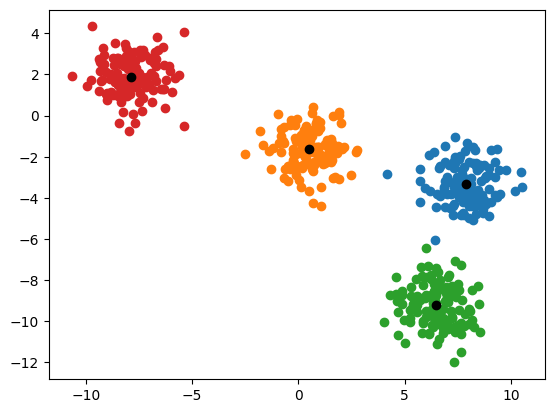

In [87]:
plot_clusters2D(clusters2, centers2)

# Use Clustering to Compress an Image
The k-means clustering algorithm can be used to reduce the file size of an image by limiting the number of colors. You should be already familiar with the RGB color model (https://rgbacolorpicker.com) and the representation of images using the Image module and numpy arrays. 

First write a utility function **show_colors(colors)** that takes an $n\times 3$ array `colors` containing the RGB values (0 to 255) for $n$ colors and displays them by calling `plt.plot` or `plt.scatter` using the square marker `'s'`. Both plotting functions have a `color` parameter that can be assigned an RGB tuple. The R, G, B values must be scaled to a range of 0 to 1 (instead of 0 to 255) before passing to the plotting function. 

Example: 
```
colors = np.array([[1, 25, 145], 
                   [4, 50, 255], 
                   [0, 150, 255], 
                   [120, 215, 255]).reshape(4, 3)
show_colors(colors)
```
might display

<img src="http://www.coloradomath.org/python/show_colors.jpg" width="238" height="70" style="display:block; margin:auto" />
It is not necessary to exactly match this output.

In [84]:
colors = np.array([[1, 25, 145], 
                   [4, 50, 255], 
                   [0, 150, 255], 
                   [120, 215, 255]]).reshape(4, 3)


In [96]:
def show_colors(colors):
    x = 0
    plt.axis('off')
    colors = colors/255
    

    for i in colors:
        plt.scatter(x ,0 ,s = 300, marker= 's', color = i)
        x+=1
    
    plt.show()

Write a function **compress_colors(filename, ncolors, max_iter)** that does the following:
* Use `Image` to read in a .jpg or .png file.
* Display the image.
* Convert the image to RGB mode.
* Convert the image to a numpy array of type `float`. 
* Optional: In machine learning problems, it is common to normalize the attribute values. Scale the R, G, B values to a range of 0 to 1. You will need to convert back later before creating a new image.
* Use `kmeans()` to group the colors in the image into `ncolors` clusters. Note that each `(R, G, B)` color corresponds to a point in 3D.
* When done with the clustering, call `show_colors()` to display the selected colors.
* Create a new image using the selected colors.
* The return value is the new image in PIL Image format.
* Optional: Save the new image and compare its file size to the original.

Example:  
```
compress_colors('snow.jpg', 16, 5)
```
might generate the output below. The result will vary depending on the initial set of centers selected at random.

<img src="http://www.coloradomath.org/python/snow.jpg" width="256" height="180" style="display:block; margin:auto" />

```
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
```
<img src="http://www.coloradomath.org/python/show_colors16.jpg" width="907" height="70" style="display:block; margin:auto" />

<br>

<img src="http://www.coloradomath.org/python/snow16.jpg" width="256" height="180" style="display:block; margin:auto" />


In [103]:
def compress_colors(filename, ncolors, max_iter):
    im = Image.open(filename)
    im = im.convert('RGB')

    display(im)
    
    im_data = np.array(list(im.getdata()))

    centers = kmeans(im_data, ncolors, max_iter)

    show_colors(centers)

    for i in range(0,len(im_data)):
        im_data[i] = centers[closest_center(im_data[i], centers)]
    
    im_data = im_data.reshape(im.size[1],im.size[0],3).astype('uint8')
    
    return Image.fromarray(im_data)    

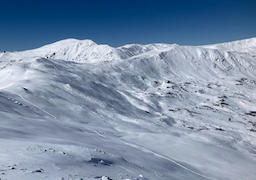

Iteration 0
Iteration 1
Iteration 2
Iteration 3


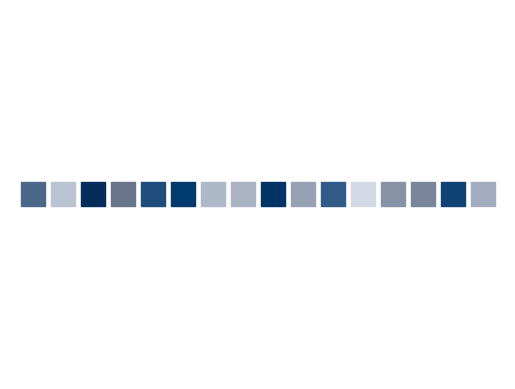

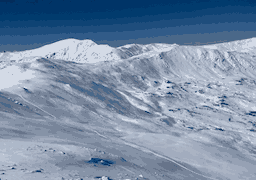

In [104]:
compress_colors('snow.jpg',16,4)